This notebook is part of the orix documentation https://orix.rtfd.io. Links to the documentation won’t work from the notebook.

## Stereographic projection of point groups

Point group symmetry operations are shown here under the stereographic projection.

Vectors located on the upper (z > 0) hemisphere are displayed as crosses (+), whereas vectors on the lower hemisphere are reprojected onto the upper hemisphere and shown as open circles (o).

For example the D3 point group:

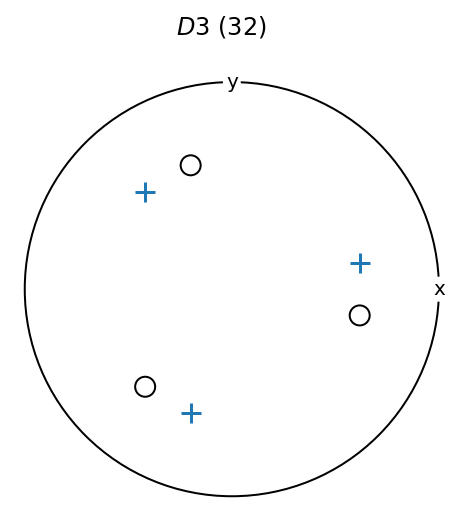

In [3]:
import numpy as np

from orix.vector import Vector3d
from orix.quaternion import Rotation, symmetry

ori = Rotation.from_axes_angles((-1, 8, 1), np.deg2rad(65))

ori_sym = symmetry.D3.outer(ori)
v = ori_sym * Vector3d.zvector()

# separate vectors on upper/lower hemishphere
v_upper = v[v.z >= 0]
v_lower = v[v.z < 0]
# reproject vectors on lower hemisphere to upper hemisphere
v_lower.z *= -1

figure = v_upper.scatter(marker='+', s=100, return_figure=True, axes_labels=('x', 'y', None))
v_lower.scatter(marker='o', fc='None', ec='k', s=100, figure=figure)

_ = figure.suptitle(f'$D3$ $({symmetry.D3.name})$')

The stereographic projection of all point groups is shown below:

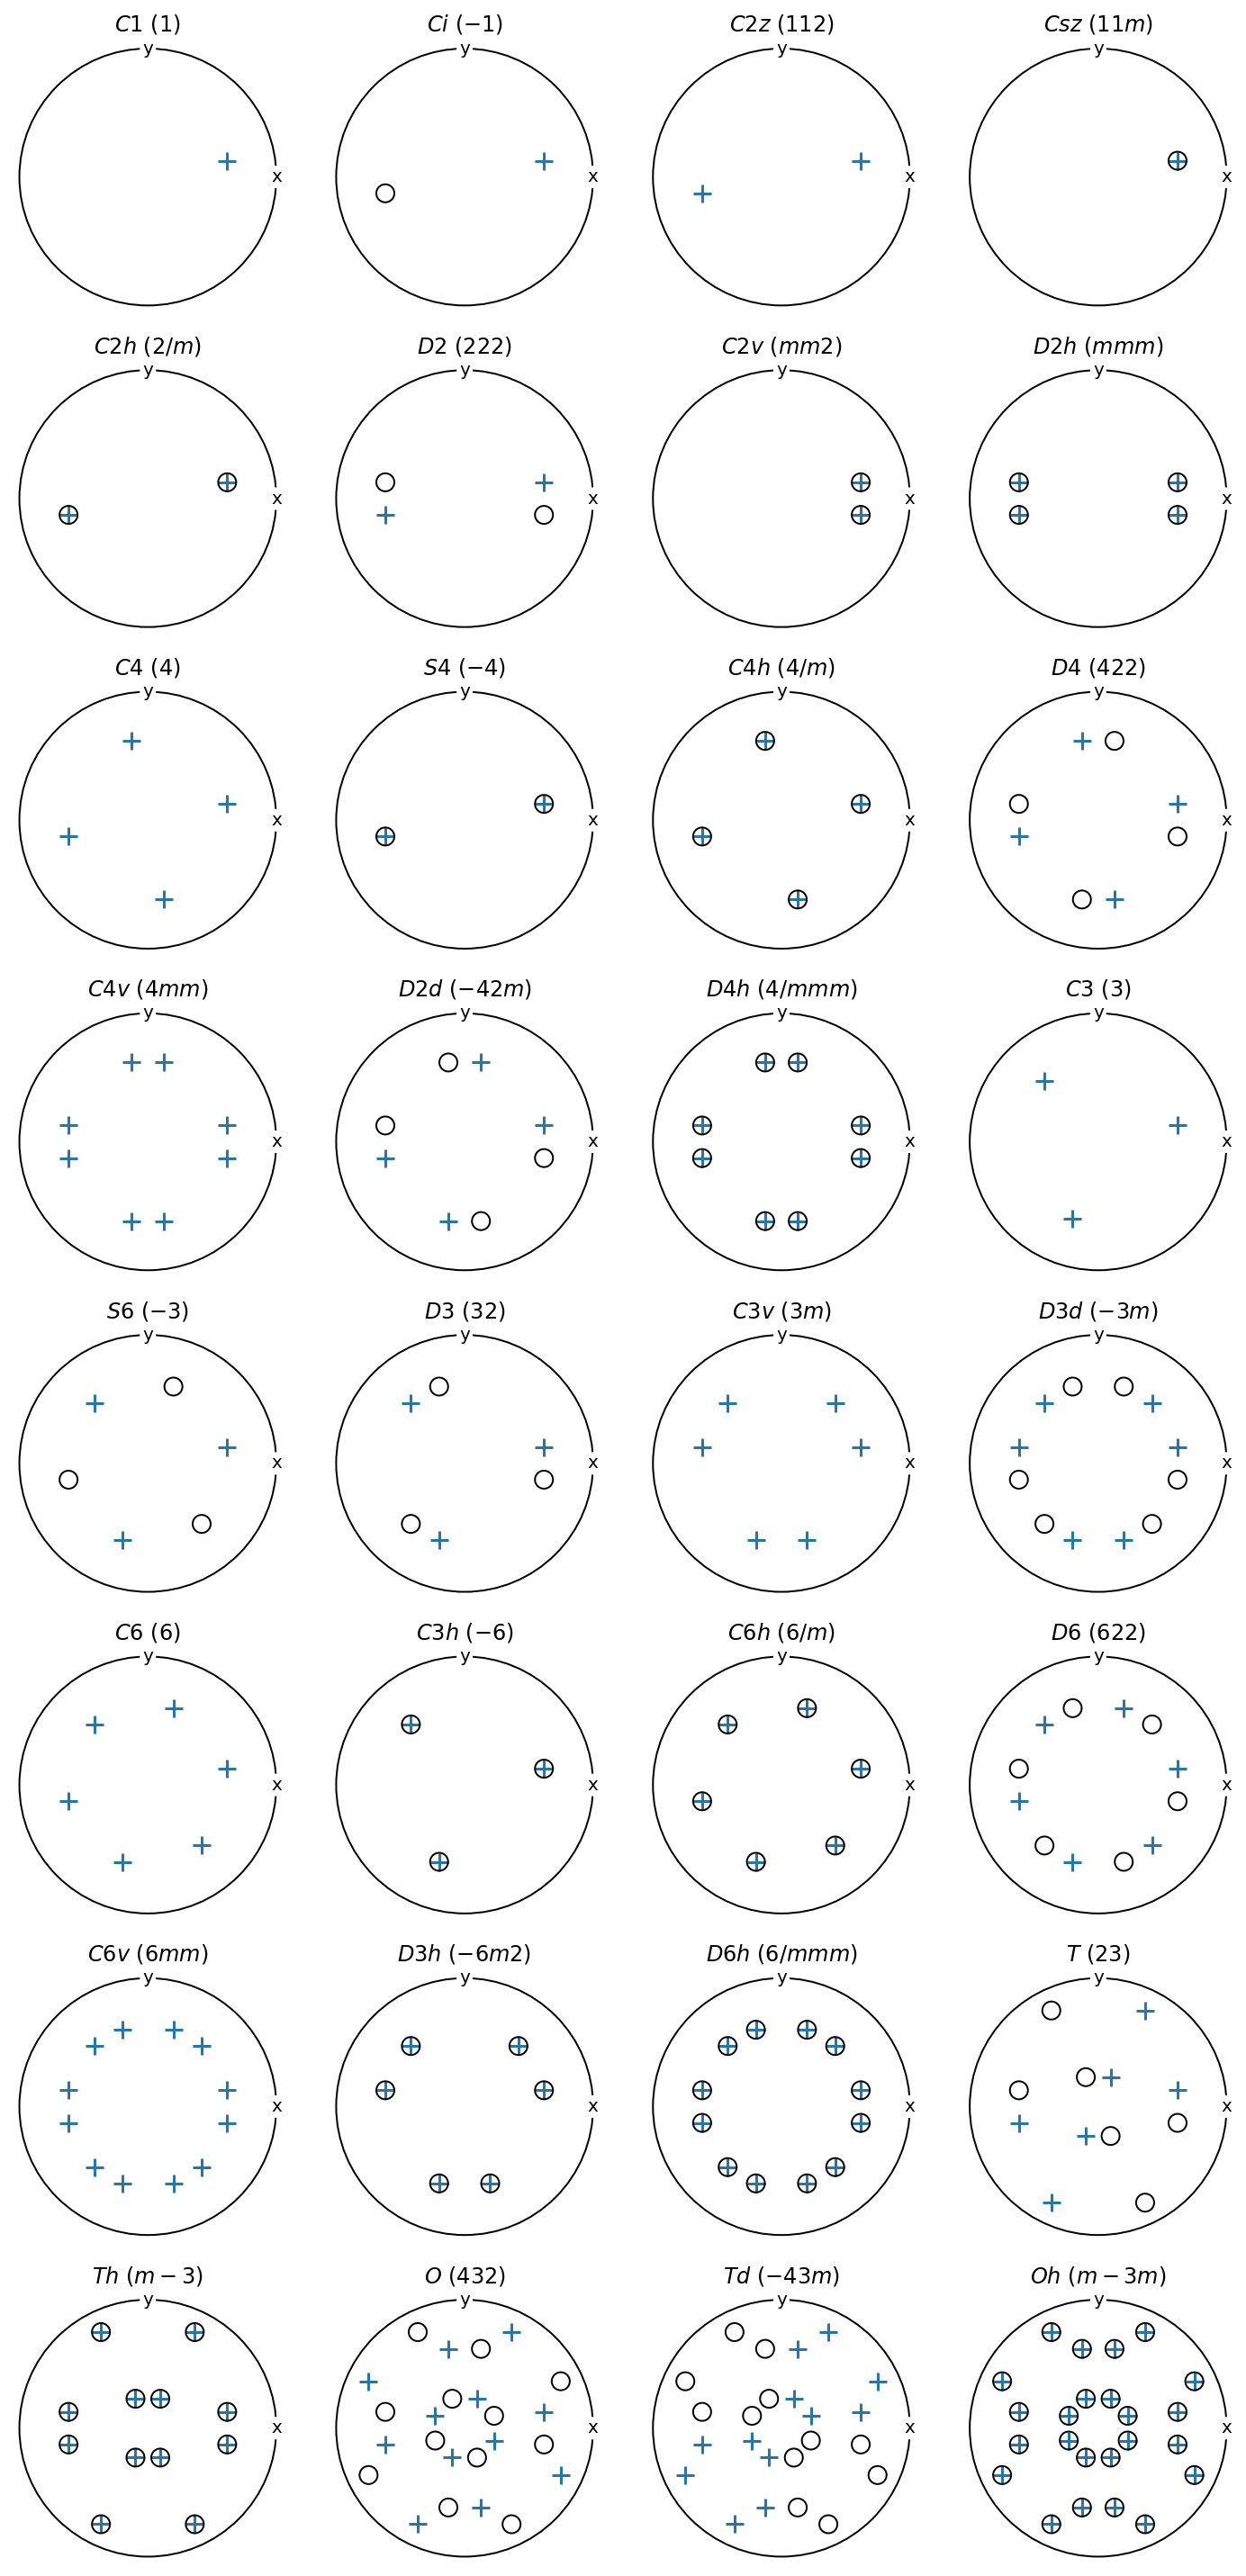

In [4]:
from matplotlib import pyplot as plt

import orix.plot.stereographic_plot


schoenflies = ['C1', 'Ci', 'C2x', 'C2y', 'C2z', 'Csx', 'Csy', 'Csz', 'C2h', 'D2', 'C2v', 'D2h', 'C4', 'S4', 'C4h', 'D4', 'C4v', 'D2d', 'D4h', 'C3', 'S6', 'D3x', 'D3y', 'D3', 'C3v', 'D3d', 'C6', 'C3h', 'C6h', 'D6', 'C6v', 'D3h', 'D6h', 'T', 'Th', 'O', 'Td', 'Oh']

assert len(symmetry._groups) == len(schoenflies)

schoenflies = [s for s in schoenflies if not (s.endswith('x') or s.endswith('y'))]

assert len(schoenflies) == 32

fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(10, 20), subplot_kw=dict(projection='stereographic'))
ax = ax.ravel()

for i, s in enumerate(schoenflies):
    sym = getattr(symmetry, s)

    ori_sym = sym.outer(ori)
    v = (ori_sym * Vector3d.zvector())

    v_upper = v[v.z >= 0]
    v_lower = v[v.z < 0]
    v_lower.z *= -1
    
    ax[i].scatter(v_upper, marker='+', s=100)
    ax[i].scatter(v_lower, marker='o', fc='None', ec='k', s=100)

    ax[i].set_title(f'${s}$ $({sym.name})$')
    ax[i].set_labels(zlabel=None)

fig.tight_layout()